# Keterangan

Penjelasan dengan font miring / italic adalah penjelasan pribadi

# Praktikum 1

Klasifikasi SVM dengan Data Dummy

*Proses import library numpy dengan alias np, matplotlib.pyplot dengan alias plt, scipy.stats, seaborn dengan alias sns*

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

*Melakukan import module make_blobs dari sklearn.datasets untuk membuat dataset random dengan jumlah 50.*

*Proses plotting dengan matplotlib dilakukan menggunakan submodule scatter, dimana x adalah X kolom 0 dan y adalah X kolom 1*

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

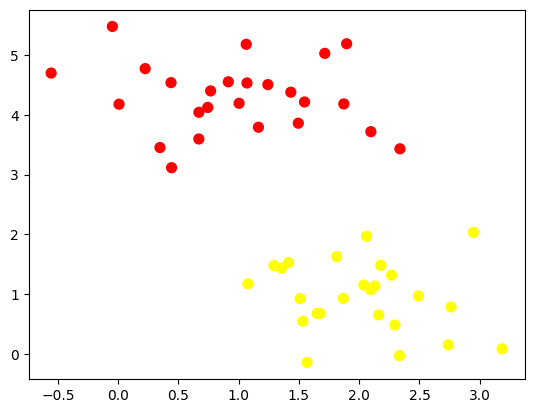

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

*Pembuatan array dengan jarak spasi yang sama menggunakan np.linspace*

*Kembali mengampilkan scatter plot sebelumnya*

*Plot karakter X dengan posisi X=0.6 dan y=[2.1]*

*Plot garis pemisah menggunakan for loop*

*Limit X pada plot dengan range -1 sampai 3.5*

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


(-1.0, 3.5)

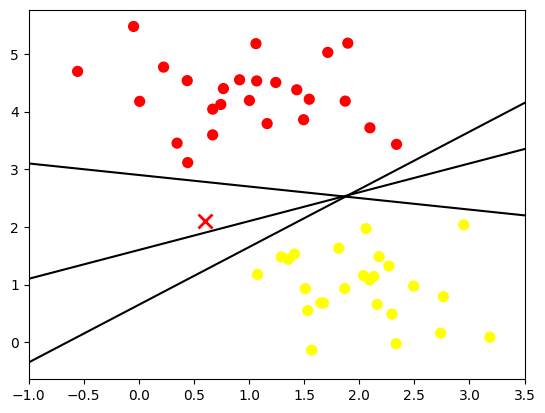

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

*Pembuatan margin pada garis pemisah yang telah di plot sebelumnya, berguna untuk menentukan decision boundary paling optimal*

(-1.0, 3.5)

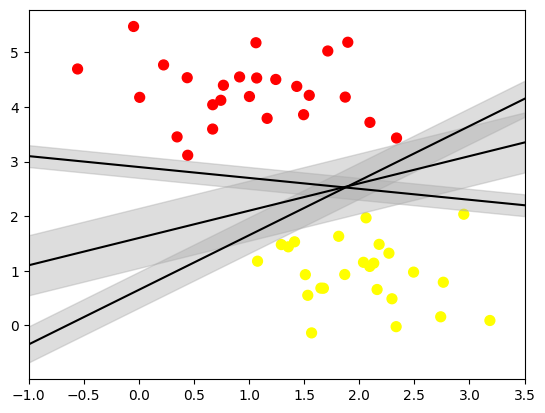

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

## Penerappan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

*Pembuatan fungsi untuk memvisualisasikan bagaimana model SVC mengklasifikasikan titik data, termasuk decision boundary, margin, dan support vector. Berguna untuk memahami proses pengambilan keputusan SVM dalam ruang fitur 2D.*

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

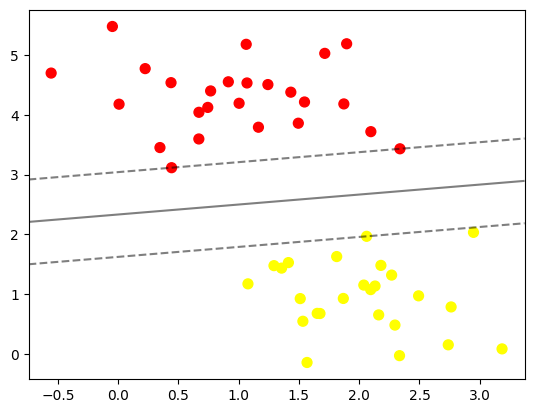

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

*Menampilkan data support vector*

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

*Pembuatan dan pemanggilan fungsi plot_svm yang merupakan fungsi untuk menampilkan plot svm dengan data awal yang adjustable melalui paramter*

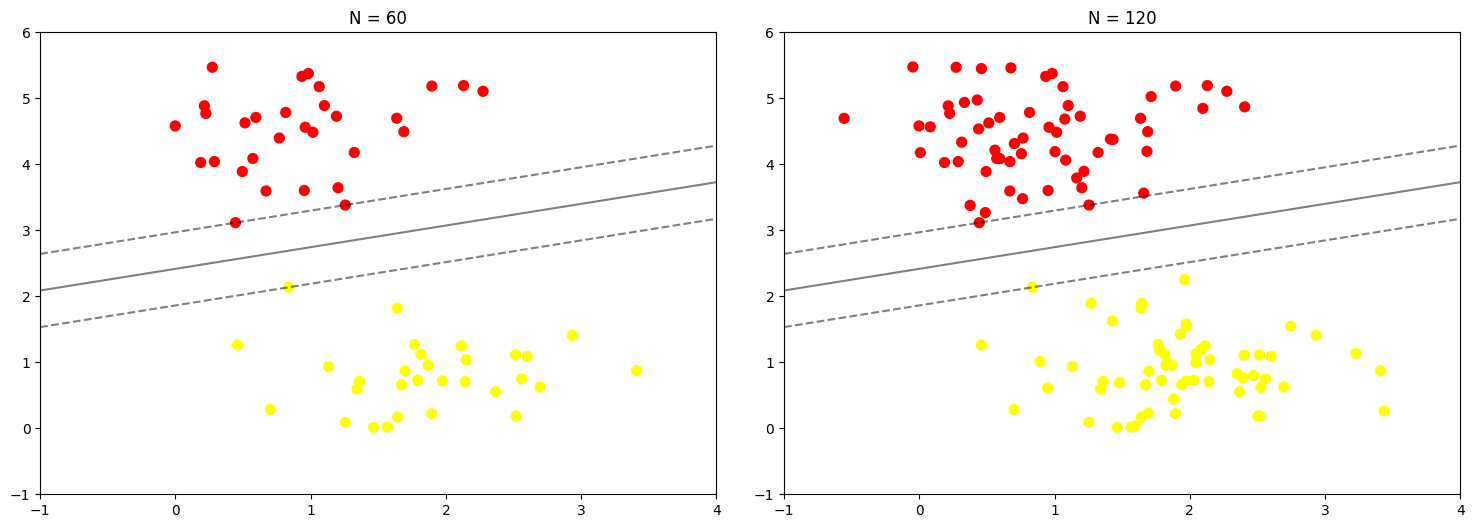

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

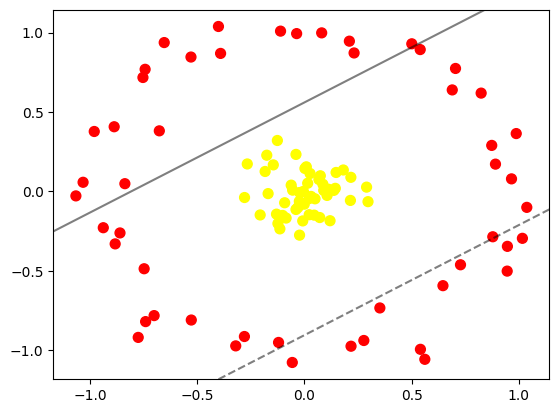

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

*Penggunaan mplot3d dari mpl_toolkits untuk plotting 3D, dan interactable menggunakan library ipywidgets*

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.40134659e-01,  8.93077127e-01],
       [-5.27959000e-01, -8.10312762e-01],
       [-1.75715118e-01,  2.27684075e-01],
       [ 1.47702773e-01,  1.19079470e-01],
       [-2.79504046e-01, -3.87767894e-02],
       [-1.83408831e-01,  1.25330755e-01],
       [ 6.89664076e-01,  6.38945319e-01],
       [-2.06554893e-01, -1.48576655e-01],
       [ 2.21268704e-02, -4.55779025e-02],
       [ 6.75869497e-02,  7.49511071e-02],
       [-3.20554416e-01, -9.73155500e-01],
       [ 1.12665785e-01,  1.32160103e-02],
       [ 1.05666638e-01, -2.54931902e-02],
       [-7.41050895e-01, -8.20225635e-01],
       [ 2.16642429e-01,  8.85478391e-02],
       [ 9.45970829e-01, -5.02244623e-01],
       [-7.47884563e-01, -4.87372841e-01],
       [ 2.61505162e-02,  1.12460150e-01],
       [ 5.00897365e-01,  9.29442049e-01],
       [ 4.52465832e-02, -1.49662753e-01],
       [-7.75543064e-01, -9.19787088e-01],
       [-1.45351492e-01,  1.66835764e-01],
       [ 2.22289093e-02, -1.47083957e-01],
       [ 3.07838634e-02, -3.17749075e-02],
       [ 7.28147064e-01, -4.62316001e-01],
       [ 8.91320112e-01,  1.71516122e-01],
       [-1.11504383e-01,  1.00919701e+00],
       [-4.84658681e-03,  2.90930777e-06],
       [ 8.76757189e-03,  1.54541928e-01],
       [-9.38537473e-01, -2.28947048e-01],
       [ 1.03747830e+00, -1.00712360e-01],
       [-8.60610041e-01, -2.61832818e-01],
       [ 9.88175416e-01,  3.64034720e-01],
       [ 1.51551563e-02,  5.13092211e-02],
       [-9.22428527e-02, -7.17377628e-02],
       [ 2.89953269e-01,  2.67036922e-02],
       [-6.77107464e-01,  3.81218943e-01],
       [-5.66966868e-02, -1.07768497e+00],
       [ 2.09646865e-01,  9.45967345e-01],
       [ 7.40876685e-02,  9.82525666e-02],
       [-8.55789331e-02, -1.68099562e-01],
       [ 4.93203510e-02, -4.68211815e-02],
       [-9.35613967e-04, -8.05945415e-02],
       [ 1.37115276e-01,  6.39222847e-03],
       [-5.51127125e-02,  7.74925803e-03],
       [ 8.04665298e-02,  9.98257127e-01],
       [ 1.01693358e+00, -2.95728657e-01],
       [ 9.66138248e-01,  7.87455117e-02],
       [-1.06632090e+00, -2.85033428e-02],
       [ 2.17366184e-01, -9.75269059e-01],
       [-3.94843518e-02,  2.32726662e-01],
       [-7.95755547e-03, -1.86116394e-01],
       [ 8.99759820e-02,  6.12101463e-03],
       [ 1.19447835e-01, -1.84920626e-01],
       [ 8.24450195e-01,  6.18860062e-01],
       [-2.80059944e-01, -9.14170094e-01],
       [ 5.41180861e-01, -9.94804296e-01],
       [-2.27510415e-02, -2.75708173e-01],
       [ 7.04887632e-01,  7.74116107e-01],
       [-6.18366206e-02,  3.91491795e-02],
       [-1.26300821e-01,  3.20468571e-01],
       [-2.66738070e-01,  1.72626480e-01],
       [ 2.30186822e-03,  1.44415625e-01],
       [-3.63885733e-02,  9.93614472e-01],
       [-7.43313990e-01,  7.68782743e-01],
       [ 7.13422469e-02, -1.64816123e-01],
       [ 2.77136090e-01, -9.39205298e-01],
       [-4.01204152e-01,  1.03852860e+00],
       [-1.01661813e-01, -1.51572305e-01],
       [-8.37788367e-01,  4.84023054e-02],
       [-9.80694140e-01,  3.77139040e-01],
       [ 8.73869893e-01,  2.89490324e-01],
       [ 2.96602977e-01, -6.47658799e-02],
       [-8.87702388e-01,  4.06981807e-01],
       [ 8.60885456e-02,  4.47576089e-02],
       [ 2.14518298e-01, -5.69972682e-02],
       [ 1.81336870e-01,  1.34665380e-01],
       [-7.53495881e-01,  7.17277229e-01],
       [ 6.46258678e-01, -5.93941227e-01],
       [-2.38459779e-02, -6.22606945e-02],
       [ 8.78811423e-01, -2.85957354e-01],
       [-1.20770295e-01, -9.51497588e-01],
       [-1.03278431e+00,  5.72590905e-02],
       [-8.83052509e-01, -3.30760131e-01],
       [ 2.31675788e-01,  8.71771366e-01],
       [-1.23739468e-01, -2.02414165e-01],
       [-3.02884987e-02, -1.01111382e-01],
       [-3.91245026e-01,  8.68880009e-01],
       [-1.14572931e-01, -2.36200093e-01],
       [-6.54231771e-01,  9.37199258e-01],
       [-1.30327608e-01, -1.43432990e-01],
       [-7.01369738e-01, -7.82452019e-01

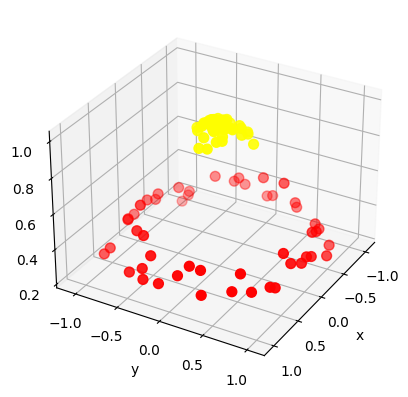

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

In [ ]:
<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.11710337e-01, -4.96366283e-01],
       [ 7.27539244e-01, -7.04340110e-01],
       [ 1.15377033e+00,  4.22281369e-02],
       [-1.93508568e-02, -2.45661004e-03],
       [-2.84303065e-02, -8.12580465e-02],
       [ 5.47108604e-03, -1.23375502e-01],
       [-4.16440568e-02, -2.99573424e-02],
       [-5.82375560e-01, -9.38192480e-01],
       [-8.27126076e-01,  5.42230072e-01],
       [ 7.85210547e-01,  4.54940992e-01],
       [-3.88559391e-01,  3.84652903e-02],
       [-3.42088050e-01,  8.55511799e-01],
       [-4.81425570e-02, -1.59928417e-01],
       [ 1.87022047e-03,  1.89494319e-01],
       [-9.69086983e-03,  1.17829251e-01],
       [-7.84345928e-01, -4.66479993e-01],
       [ 6.85107055e-02,  1.77194939e-01],
       [ 1.72857740e-01,  4.38177465e-02],
       [-8.12998991e-01, -7.19923857e-01],
       [-2.01575223e-01, -2.39583752e-02],
       [-9.75925418e-01,  2.60953744e-01],
       [-4.13054659e-02,  2.00812665e-01],
       [ 7.13340431e-01, -8.16168303e-01],
       [ 3.64574410e-02, -1.07939842e+00],
       [-1.54397411e-01,  4.40008002e-02],
       [-4.93135049e-01,  8.08010876e-01],
       [ 1.45393445e-01, -1.46592893e-02],
       [-8.21113259e-01,  6.26589314e-01],
       [-8.27379977e-01, -2.75044907e-01],
       [ 9.48902221e-02, -6.27649995e-02],
       [-2.21554724e-02,  1.01028554e-01],
       [-1.09030379e+00,  6.74538986e-02],
       [ 1.55846639e-01,  1.61971599e-01],
       [-9.13666743e-02, -7.04703795e-02],
       [-8.13169827e-01, -5.03526231e-01],
       [ 4.07881892e-01, -7.07374192e-01],
       [-2.69630418e-01, -1.19784632e+00],
       [-8.71995956e-01, -2.28090950e-01],
       [ 3.93399315e-02,  9.72349031e-01],
       [ 8.35245788e-02,  9.58777109e-03],
       [ 1.01780488e+00, -3.43266966e-02],
       [-3.03151481e-01,  5.05179111e-02],
       [ 7.29975189e-02, -2.79509483e-01],
       [ 1.18741375e-02, -1.83848700e-02],
       [ 1.21826951e-02, -4.98787854e-02],
       [-5.11708040e-01, -8.51074760e-01],
       [ 2.41015661e-01, -4.71012997e-03],
       [ 6.90842546e-01,  8.45957622e-01],
       [-1.11030618e-02, -2.35284175e-01],
       [ 8.39749655e-01,  5.63132132e-01],
       [ 8.61108999e-02,  9.49359269e-01],
       [-7.34090929e-02, -2.07504095e-01],
       [ 6.60956273e-02,  3.87593881e-01],
       [ 3.19380104e-01, -1.03269710e+00],
       [ 5.29011856e-03,  5.08287163e-02],
       [-1.52505024e-02,  9.80360676e-02],
       [ 3.30861296e-01,  1.01634300e+00],
       [ 7.08355114e-02,  2.95618673e-01],
       [ 4.51967451e-01,  8.62692136e-01],
       [-7.30276209e-02, -9.40698117e-01],
       [-1.88912212e-01, -2.39175141e-02],
       [ 1.44720944e-01,  1.18452174e+00],
       [ 5.32671697e-02, -1.09540084e-01],
       [ 2.48016942e-02, -3.08731322e-01],
       [-5.61754363e-02, -1.10575612e-02],
       [-1.81478209e-02,  1.88981091e-01],
       [-3.90760142e-01,  9.17806040e-01],
       [-5.97653736e-02, -1.22911470e+00],
       [-1.16245908e+00,  3.07466341e-01],
       [-2.53459621e-01,  9.62177787e-01],
       [-2.67966216e-02, -5.15756373e-02],
       [-1.88229489e-04, -1.99898237e-01],
       [ 1.16661531e-01, -1.57798693e-01],
       [-1.21836026e-01, -1.68045549e-01],
       [ 1.02023011e-01,  9.51238087e-03],
       [ 2.76691140e-02,  2.35529803e-01],
       [-6.96873537e-01,  7.33320715e-01],
       [ 1.00916206e+00, -4.53327793e-01],
       [ 1.01853684e+00, -3.31902619e-01],
       [ 5.66691765e-01,  8.72696245e-01],
       [ 8.47878444e-01,  3.29580343e-01],
       [ 9.12248953e-01, -3.59369459e-01],
       [ 2.23464288e-01, -9.28408565e-01],
       [-1.34216871e-01,  2.34427080e-02],
       [-1.25646754e-01, -2.43748701e-01],
       [ 9.88629144e-01, -7.15813419e-02],
       [ 3.14491126e-01, -8.06705684e-01],
       [ 6.02048609e-01,  9.44127099e-01],
       [-9.81202450e-01,  1.21225826e-01],
       [ 2.70639526e-02,  5.70377390e-02],
       [-8.06006784e-02, -1.82845293e-01],
       [ 4.60760700e-02, -1.17021890e-01],
       [-2.81166812e-01,  2.53371733e-01],
       [-8.57977773e-01, -9.05159358e-01],
       [ 1.84687093e-01,  9.10867575e-03],
       [ 8.16628676e-01,  4.68389299e-02],
       [ 4.76247020e-02, -3.81171893e-02],
       [ 7.20594596e-01, -5.19359481e-01],
       [-8.64587235e-01,  7.40524241e-01],
       [-9.46013036e-02,  8.56559489e-02]]), y=array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]))>

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

*Pembuatan model dengan SVC dengan kernel 'rbf'*

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [ ]:
SVC(C=1000000.0)

SVC(C=1000000.0)

Menampilkan scatter plot dari model SVC dengan kembali menggunakan function plot_svc_decision_function. Dimana nilai X adalah support_vector kolom pertama dan y adalah support_vector kolom kedua.

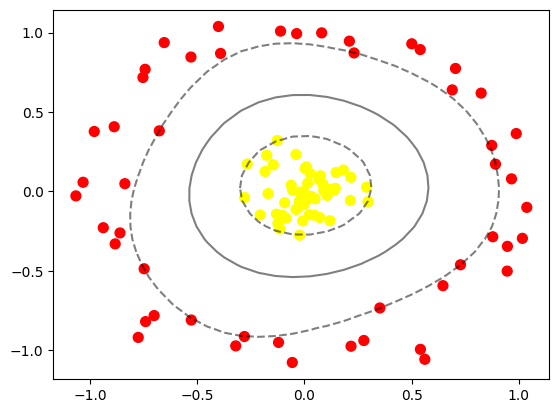

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data Overlap

*Pembuatan dat set berjumlah 100 sample dengan data yang overlapping.*

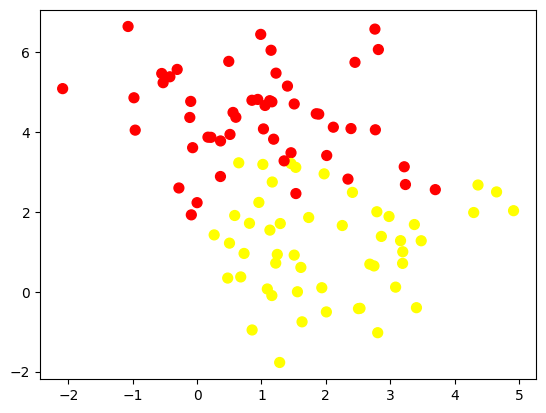

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

*Penggunaan nilai C yang berbeda pada kedua model memungkinkan nilai C yang lebih kecil memiliki margin yang lebih halus.*

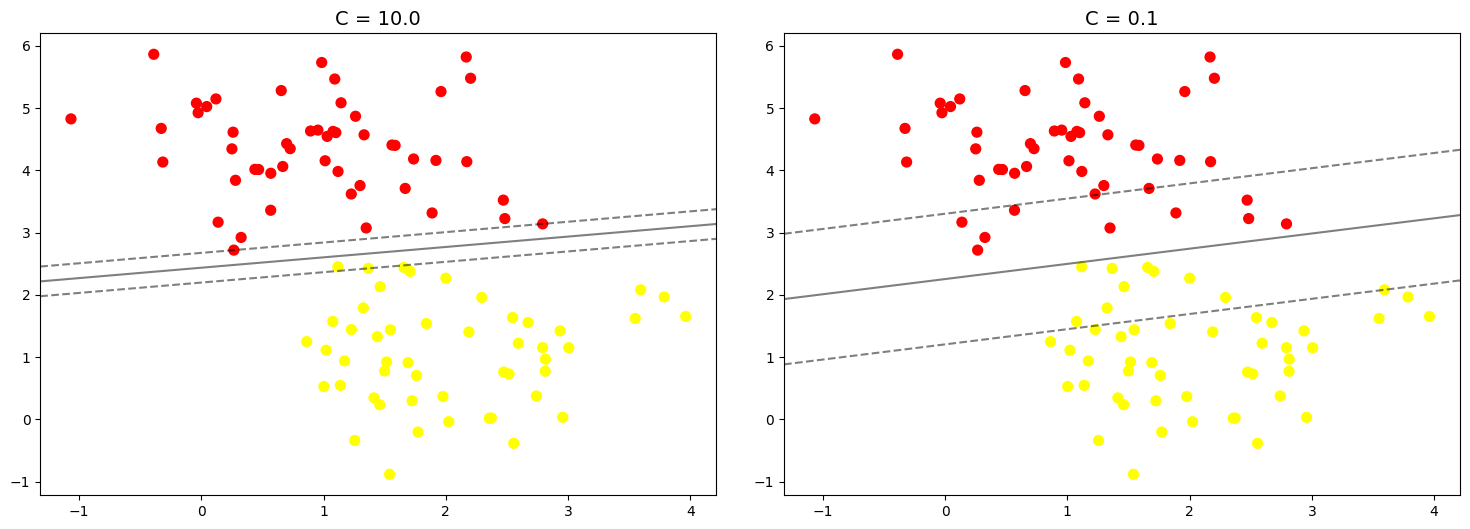

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

# Praktikum 2

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

*Proses import dataset wajah yang sudah ada pada library sklearn sebanyak 60, dan print hasilnya*

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


*Visualisasi data wajah yang telah diimport serta labelnya yaitu nama*

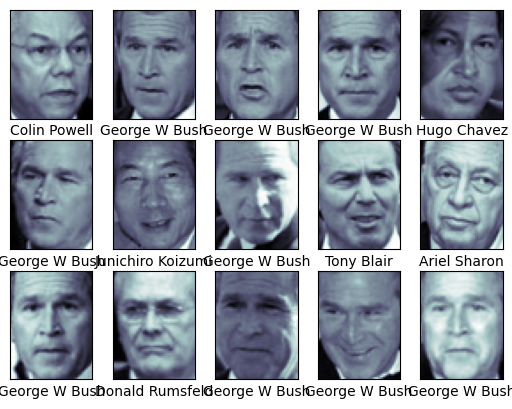

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

*Import library sklearn.svm dengan alias SVC, sklearn.decomposition.PCA dengan alias RandomizedPCA, sklearn.pipeline dengan alias make_pipeline.*

*Proses pembuatan pipeline dengan fungsi melakukan reduksi fitur pada data menggunakan PCA terlebih dahulu setelah itu SVC digunakan sebagai model klasifikasi.*

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Proses split data train dan test menggunakan module train_test_split dari sklearn.model_selection dengan tidak adanya nilai default maka test size adalah 25% dan train adalah 75%.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

[[0.53464055 0.5254902  0.49673203 ... 0.00653595 0.00653595 0.00261438]
 [0.28627452 0.20784314 0.2522876  ... 0.96993464 0.9490196  0.9346406 ]
 [0.31895426 0.39215687 0.275817   ... 0.4261438  0.7908497  0.9555555 ]
 ...
 [0.11633987 0.11111111 0.10196079 ... 0.5686274  0.5803922  0.5542484 ]
 [0.19346406 0.21176471 0.2901961  ... 0.6862745  0.654902   0.5908497 ]
 [0.12287582 0.09803922 0.10980392 ... 0.12941177 0.1633987  0.29150328]]


*Proses pencarian kombinasi dari hyperparameters yang paling optimal untuk performa model*

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 37s, sys: 26.6 s, total: 2min 3s
Wall time: 1min 22s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


*Assignment grid.best_estimator_ pada variable model, dan proses prediksi nama dari XTest yaitu data wajah pada variable yfit.*

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Plotting hasil prediksi nama (merah untuk prediksi yang salah)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

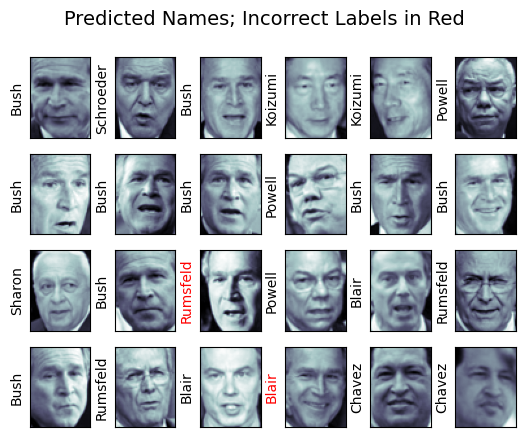

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

*Menampilkan report klasifikasi pada variable yfit menggunakan module classification_report milik sklearn.metrics dengan dasar data yaitu ytest*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



*Pembuatan confusion matrix dari hasil prediksi dan actual value.*

Text(113.92222222222219, 0.5, 'predicted label')

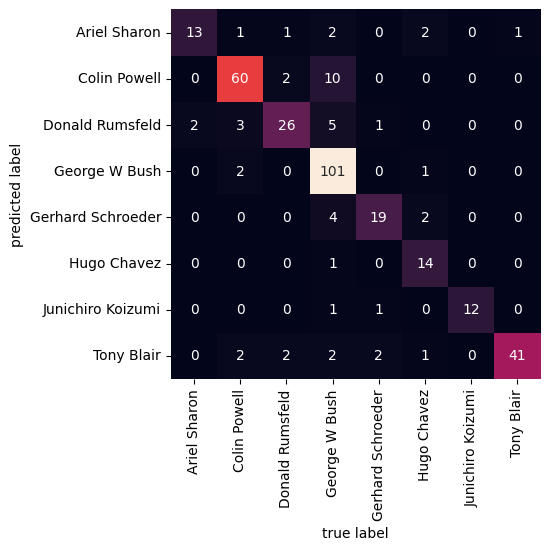

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Praktikum 3

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

## Mendefiniskan Data Dummy

*Membuat data dummy menggunakan make_classification dari sklearn.datasets, dengan sample berjumlah 30, 2 fitur, 2 class, 2 informative, absolutkan nilai X, bulatkan nilai ke 2 angka dibelakang koma, kalikan 100 untuk eliminasi koma, ubah nilai X ke dalam bentuk integer*

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[131  63]
 [269  33]
 [ 28 107]
 [ 76 111]
 [ 65 128]
 [127 179]
 [ 47 112]
 [ 85  57]
 [ 51 174]
 [139  42]
 [144  37]
 [124  66]
 [ 28 208]
 [168   3]
 [123  66]
 [ 30 204]
 [ 21  25]
 [165 137]
 [110 115]
 [109 148]
 [ 90 100]
 [162 129]
 [ 47   3]
 [178 177]
 [ 88 197]
 [112 159]
 [ 78  41]
 [ 74   5]
 [ 95  30]
 [ 10   4]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

-    n_samples: jumlah sampel yang diinginkan

-    n_features: jumlah fitur yang digunakan

-    n_classes: jumlah kelas

-    n_informative: jumlah fitur yang memiliki korelasi dengan kelas

-    n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

-    n_repeated: jumlah fitur yang diulang

## (Opsional) Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,120,165,0
1,90,91,0
2,95,115,0
3,101,108,0
4,109,127,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

*Proses perubahan label dari bentuk integer / angka ke string / katergorial*

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,120,165,Kelas B
1,90,91,Kelas B
2,95,115,Kelas B
3,101,108,Kelas B
4,109,127,Kelas B


## (Opsional) Visualisasi Data

*Proses visualisasi data, menggunakan scatter plot pada kedua class data (class A berwarna Ungu Merah Muda dan class B berwarna biru navy)*

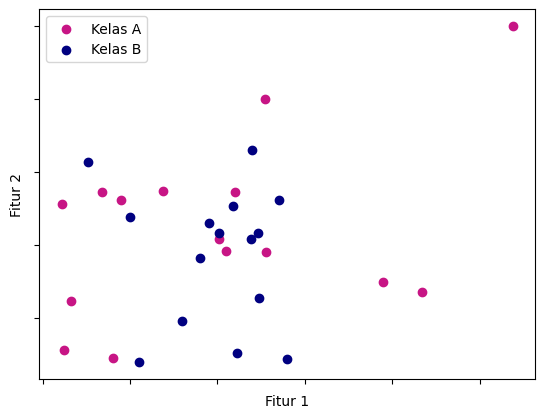

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

*Import library relevant dari sklearn yaitu naive_bayes.MultinomialNB, model_selection.train_test_split, metrics.accuracy_score*

*Splitting data train dan test dengan perbandingan 70:30*

*Fitting data train pada model naive_bayes.MultinomialNB*

*Proses prediksi dengan data training*

*Evaluasi akurasi prediksi train data menggunakan module function accuracy_score*

*Proses prediksi menggunakan test data*

*Evaluasi akurasi prediksi test data menggunakan function accuracy_score*

*Hasil prediksi train dan test adalah 0.6190476190476191, 0.5555555555555556 secara berturut-turut*

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.5555555555555556


# Praktikum 4 (Opsional)

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

## Load Data

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

*Proses preprocessing assesement fitur berguna untuk proses klasifikasi lebih lanjut, menggunakan method head dari pandas dataframe*

In [268]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

## Pra Pengolahan Data

Beberapa hal yang akan dilakukan pada tahap ini yaitu,

1. Drop kolom yang tidak digunakan

2. Ubah nama kolom v1 (label) dan v2 (teks sms)

3. Inspeksi Data

4. Encode label

5. Memisahkan fitur dengan label

### Drop Kolom

*Drop kolom mulai index kedua sampai habis, pada axis 1 yaitu kolom dari dataframe.*

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Ubah Nama Kolom V1 dan V2

*Proses perubahan nama kolom dari dataframe, v1 menjadi Labels dan v2 menjadi SMS*

In [269]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Inspeksi Data

*Inspeksi jumlah data setiap Labels menggunakan value_counts(), cek kelengkapan / data non null dengan method info(), cek statistik deskriptif menggunakan method describe()*

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Encode Label

*Encode isi labels menjadi numerik, spam menjadi 1 dan ham menjadi 0*

In [270]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Memisahkan Fitur dengan Label**

*Define X untuk value dari kolom SMS dan y untuk kolom Labels*

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

## Ekstraksi fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

*Proses ekstraksi fitur menggunakan metode Bag of Words yaitu extraksi setiap kata pada setiap SMS*

*Pencegahan data leakage, dapat dilakukan dengan cara splitting train dan test
data*

*Fitting Xtrain pada model CountVectorizer*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training dan Evaluasi Model

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

*Proses fitting data train X dan y menggunakan model MultinomialNB*

*Definisi y_pred_train sebagai hasil prediksi nilai y pada data X_train*

*Definisi acc_train sebagai hasil accuracy_score dari data prediksi y_pred_train*

*Definisi y_pred_test sebagai hasil prediksi nilai y pada data X_test*

*Definisi acc_test sebagai hasil accuracy_score dari data prediksi y_pred_test*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# Praktikum 5

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

## Langkah 0 - Import Library

*Import library pathlib.Path (kelola file), matplotlib.image (proses gambar), matplotlib.pyplot (visualisasi), cv2 (OpenCV, pemrosesan gambar), random (angka acak), numpy (komputasi numerik), pandas (manipulasi data).*

In [52]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

*Preparasi directory train dan test.*

In [63]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

base_dir = "/content/drive/MyDrive/COLLEGE/Semester5/ML/P4/data/images/images/"

# Image directories
train_dir = f"{base_dir}/training/"
test_dir = f"{base_dir}/test/"

Mounted at /content/drive/


## Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

*Fungsi enumerasi seluruh path gambar dalam directory yang diberikan pada parameter*

In [64]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

*laod dataset (hasil read dari setiap image pada directory) menggunakan fungsi yang dibuat sebelumnya yaitu load_dataset()*

In [65]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

*Cek salah satu image, dan verifikasi bahwa data adalah tupple dengan dua data yaitu, data image dan labelnya*

In [66]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        ...,
 
        [[198, 125,  84],
         [155,  91,  47],
         [140,  88,  40],
         ...,
         [117,  64,  20],
         [117,  64,  20],
         [117,  64,  20]],
 
        [[159,  91,  54],
         [194, 135,  95],
         [151, 107,  62],
         ...,
         [116,  63,  21],
         [116,  63,  21],
         [116,  63,  21]],
 
        [[187, 123,  87],
         [252, 197, 158],
         [223, 180, 138],
         ...,
         [116,  63,  21],
  

Cek ukuran gambar secara acak

*Pilih gambar dengan cara randomisasi dan cek ukurannya*

In [67]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 92
(372, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

*Fungsi untuk memilih gambar secara acak, lalu menampilkan metadata (shape, label) dan visualisasinya menggunakan matplotlib*

In [68]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

*Visualisasi gambar dan metadata secara acak dengan fungsi random_img_viz(train_img)*

Shape	: (458, 800, 3)
Label	: night


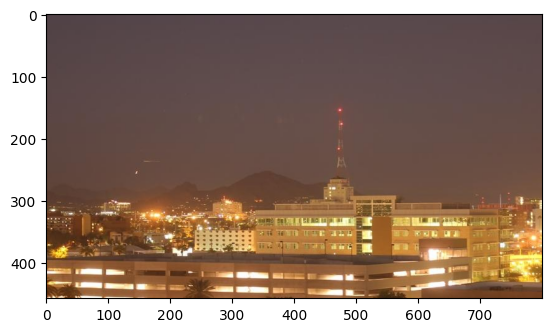

In [69]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

*Melakukan standarisasi ukuran gambar dengan dimensi 1100 x 600 menggunakan method resize dari opencv*

In [70]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

*Fungsi untuk melakukan encoding pada label data, 1 -> day, 0 -> night*

In [71]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

Fungsi preprocess melakukan bootstrapping dari fungsi - fungsi yang sudah dibuat sebelumnya yaitu standarisasi / resize dimensi image, dan encoding label, memiliki return data yang telah terstandarisasi.

In [72]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

*Running fungsi preprocess pada data training*

In [73]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak

*Proses validasi data yang telah terstandarisasi menggunakan metode acak*

In [74]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 76
(600, 1100, 3)


WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

*Validasi visual dan metadata pada data yang telah distandarisasi*

Shape	: (600, 1100, 3)
Label	: 0


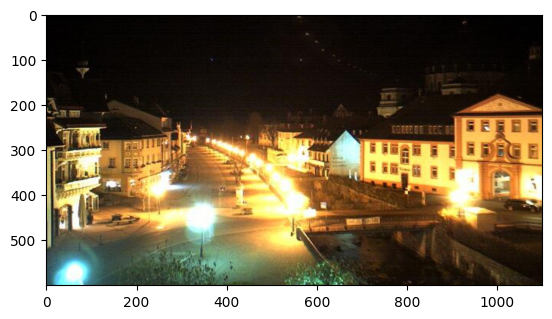

In [75]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

*Fungsi untuk menghitung rata - rata kecerahan gambar menggunakan skema warna HSV, yang kemudian menggunakan channel V sebagai tolak ukur kecerahan.*

In [76]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

*Inspeksi rata - rata kecerahan pada satu gambar terstandarisasi yang dipilih secara acak*

Image 158
Avg Brighness: 109.1136


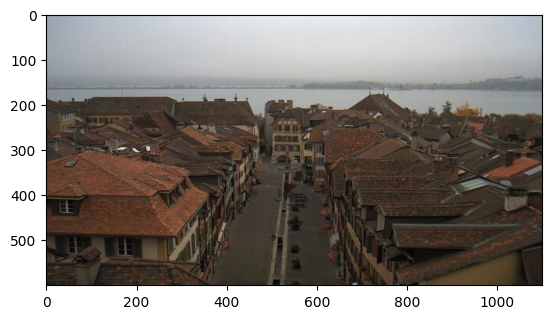

In [77]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Akan didapatkan hasil output seperti pada gambar

## Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

*Prediksi label (day / night) menggunakan threshold kecerahan yang telah di inputkan user melalui parameter fungsi.*

In [78]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

*Proses prediksi acak dari data training dengan threshold kecerahan 120 (jika lebih maka siang, jika kurang dari sama dengan maka malam)*

Image 134
Actual label: 1
Predicted label: 1


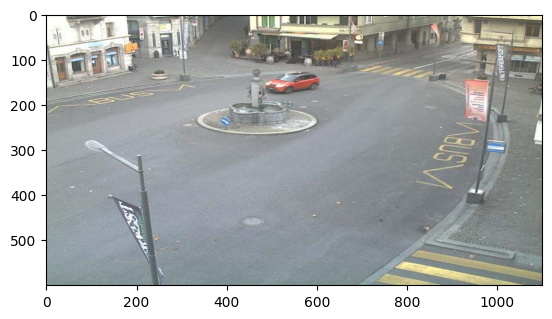

In [79]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Hasilnya akan seperti pada gambar

## Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

*Fungsi untuk mempercepat proses evaluasi algoritma, dengan cara iterasi seluruh data gambar input dan memprediksi label setiap iterasinya. Mengembalikan nilai akurasi algoritma / threshold yang diberikan*

In [80]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120

*Evaluasi model menggunakan training data dan nilai threshold 120*

In [81]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

*Proses load data testing pada test_dir, melakukan preprocess, prediksi setiap datanya, dan melakukan evaluasi terhadap hasilnya menggunakan fungsi evaluate.*

In [82]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

## Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label. Buatlah fungsi berikut,

*Fungsi ekstraksi avg brightness pada data image yang diberikan, dan membentuk ulang data menjadi dataframe yang kemudian dijadikan return value.*

In [83]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

*Proses ekstraksi kecerahan dan reshape data menjadi dataframe pada data train*

In [84]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,114.316139,0.0
1,13.262067,0.0
2,26.067339,0.0
3,30.474629,0.0
4,29.425348,0.0


Maka akan tampil output seperti pada gambar

Lakukan langkah yang serupa pada data testing

*Proses ekstraksi kecerahan dan reshape data menjadi dataframe pada data test*

In [85]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,13.228938,0.0
1,56.674038,0.0
2,19.274156,0.0
3,13.708703,0.0
4,14.008245,0.0


## Langkah 5 alternatif

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

*Proses pemisahan data untuk train dan test, dari label dan datanya.*

*Proses fitting data X_train dan y_train ke model SVC dengan kernel RBF*

In [172]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

[[114.31613939]
 [ 13.26206667]
 [ 26.06733939]
 [ 30.47462879]
 [ 29.42534848]
 [ 25.64649091]
 [ 33.76165303]
 [ 33.01553333]
 [ 14.53451667]
 [ 48.71303788]
 [  8.19189394]
 [ 25.86257727]
 [ 47.27310152]
 [ 27.68180606]
 [ 48.31327424]
 [ 25.80530606]
 [109.47733939]
 [ 13.75072727]
 [  8.30536212]
 [ 25.77309242]
 [  8.11361667]
 [108.98865909]
 [ 27.82057273]
 [ 25.73192424]
 [ 25.67861515]
 [ 25.62610909]
 [  8.43895606]
 [110.35060303]
 [ 14.39977273]
 [ 13.78688788]
 [ 25.71584848]
 [119.60317424]
 [ 48.42053636]
 [ 99.04356212]
 [ 99.08122576]
 [ 98.71472273]
 [ 98.76921364]
 [ 35.96376667]
 [ 24.33056212]
 [ 22.90184848]
 [113.00118939]
 [ 27.90035909]
 [114.8846697 ]
 [114.73627121]
 [112.85955303]
 [114.38604545]
 [ 29.07132576]
 [ 25.23426515]
 [ 71.63802576]
 [111.49298182]
 [108.4992197 ]
 [ 26.94627576]
 [102.35494242]
 [ 72.19684242]
 [109.77473636]
 [109.45617727]
 [ 21.14724697]
 [ 24.50153485]
 [113.66321364]
 [ 24.73002273]
 [110.13064697]
 [ 71.98807576]
 [ 36.16

SVC()

## Langkah 6 alternatif

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

*Proses prediksi label pada data X_train dan evaluasi akurasinya menggunakan fungsi accuracy_score. Juga melakukan hal yang sama pada test data*

In [201]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Tugas 1

### 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.

In [267]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('voice.csv')

ss, lb = StandardScaler(), LabelEncoder()

X, y = df.drop(columns=['label']), df['label']

X = ss.fit_transform(X)
y = lb.fit_transform(y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=50)

svm_model = SVC()
svm_model.fit(Xtrain, ytrain)

testPredictResult = svm_model.predict(Xtest)

accuracy = accuracy_score(ytest, testPredictResult)
print(f"Prediction accuracy: {accuracy:.4f}")

Prediction accuracy: 0.9795


### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan

#### 1. Menggunakan data spam.csv

#### 2. Fitur CountVectorizer dengan mengaktifkan stop_words

#### 3. Evaluasi hasilnya

In [278]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

X = df['SMS'].values
y = df['Labels'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)


# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

report = classification_report(y_test, y_pred_test, target_names=set(y))

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')
print('Report Klasifikasi\n', report)

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9829596412556054
Report Klasifikasi
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       954
        spam       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

#### 1. Menggunakan data spam.csv

#### 2. Fitur TF-IDF dengan mengaktifkan stop_words

#### 3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

#### 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [279]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

X = df['SMS'].values
y = df['Labels'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi TfidfVectorizer
bow = TfidfVectorizer(stop_words='english')
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)


# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

report = classification_report(y_test, y_pred_test, target_names=set(y))

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')
print('Report Klasifikasi\n', report)

Hasil akurasi data train: 0.9842943684092439
Hasil akurasi data test: 0.9605381165919282
Report Klasifikasi
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.73      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



### Kesimpulan

Berdasarkan data hasil akurasi dan report, CountVectorizer dapat dikatakan model paling relevan dalam kasus ini, tetapi tetap tidak dapat dipungkiri bahwa TfidfVectorizer memiliki lebih banyak opsi spesifik pada definisinya untuk melakukan parsing sebuah text.

# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [285]:
# Imports relvant modules
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2
import pandas as pd

def getHistogram(imgData):

    # convert it to HSV
    imgData = cv2.cvtColor(imgData, cv2.COLOR_RGB2HSV)

    # pull the histogram
    histogram = cv2.calcHist([imgData], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

    # normalize and flatten the result
    histogram = cv2.normalize(histogram, None).flatten()
    return histogram

def preprocess(dataset):
    histograms = []
    labels = []

    for data in dataset:
        histogram = getHistogram(data[0])
        label = data[1]

        histograms.append(histogram)
        labels.append(label)

    df = pd.DataFrame(histograms)
    df['LABELS'] = labels

    return df

trainData, testData = preprocess(train_std_img_list), preprocess(test_std_img_list)

Xtrain, ytrain = trainData.iloc[:, :-1].values, trainData['LABELS'].values
Xtest, ytest = testData.iloc[:, :-1].values, testData['LABELS'].values

svm_model = SVC()
svm_model.fit(Xtrain, ytrain)

testPredictResult = svm_model.predict(Xtest)

accuracy = accuracy_score(ytest, testPredictResult)
report = classification_report(ytest, testPredictResult)
print(f"Prediction accuracy: {accuracy}")
print(f"Report\n {report}")

Prediction accuracy: 0.9875
Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.99      0.99      0.99        80

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

